In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [2]:
# path on rte
db_path = "/home/rte/data/db/arxiv_db_images.sqlite3"

In [3]:
# Here we import the sqlite3 database and create a cursor

db = sqlite3.connect(db_path)
c = db.cursor()

In [4]:
c.execute('PRAGMA TABLE_INFO({})'.format("metadata"))
info = c.fetchall()

print("\nColumn Info:\nID, Name, Type, NotNull, DefaultVal, PrimaryKey")
for col in info:
    print(col)


Column Info:
ID, Name, Type, NotNull, DefaultVal, PrimaryKey
(0, 'id', 'INTEGER', 0, None, 1)
(1, 'identifier', 'TEXT', 0, None, 0)
(2, 'created', 'TEXT', 0, None, 0)
(3, 'cat', 'TEXT', 0, None, 0)
(4, 'authors', 'TEXT', 0, None, 0)
(5, 'title', 'TEXT', 0, None, 0)
(6, 'abstract', 'TEXT', 0, None, 0)
(7, 'licence', 'TEXT', 0, None, 0)


In [5]:
c.execute('PRAGMA TABLE_INFO({})'.format("images"))
info = c.fetchall()

print("\nColumn Info:\nID, Name, Type, NotNull, DefaultVal, PrimaryKey")
for col in info:
    print(col)


Column Info:
ID, Name, Type, NotNull, DefaultVal, PrimaryKey
(0, 'id', 'INTEGER', 0, None, 1)
(1, 'identifier', 'TEXT', 0, None, 0)
(2, 'filename', 'TEXT', 0, None, 0)
(3, 'filesize', 'INT', 0, None, 0)
(4, 'path', 'TEXT', 0, None, 0)
(5, 'x', 'INT', 0, None, 0)
(6, 'y', 'INT', 0, None, 0)
(7, 'imageformat', 'TEXT', 0, None, 0)


In [9]:
# Get list of all primary categories

c.execute('''
    SELECT substr(trim(metadata.cat),1,instr(trim(metadata.cat)||' ',' ')-1), count(images.identifier)
    FROM images
    LEFT JOIN metadata ON images.identifier = metadata.identifier 
    GROUP BY substr(trim(metadata.cat),1,instr(trim(metadata.cat)||' ',' ')-1)
    ORDER BY count(images.identifier) DESC    
    ''')
rows = c.fetchall()
for row in rows:
    print(row)

('hep-ph', 814037)
('astro-ph', 742929)
('cs.CV', 536024)
('astro-ph.GA', 414296)
('astro-ph.CO', 394900)
('astro-ph.SR', 368520)
('quant-ph', 307949)
('hep-th', 287747)
('astro-ph.HE', 260679)
('cond-mat.mes-hall', 243985)
('cond-mat.str-el', 242199)
('hep-ex', 225621)
('cond-mat.stat-mech', 208411)
('nucl-th', 199725)
('gr-qc', 195447)
('cs.LG', 189391)
('math.NA', 183991)
('cond-mat.mtrl-sci', 176125)
('cond-mat.soft', 150161)
('cs.IT', 148683)
('astro-ph.EP', 143683)
('hep-lat', 129076)
('stat.ML', 128104)
('cond-mat.supr-con', 126255)
('astro-ph.IM', 123009)
('math.GT', 116189)
('physics.flu-dyn', 112735)
('math.OC', 94774)
('physics.ins-det', 92583)
('nucl-ex', 87936)
('stat.ME', 85470)
('cs.NI', 82362)
('math.CO', 81315)
('physics.optics', 72789)
('cond-mat.quant-gas', 72275)
('physics.soc-ph', 66901)
('math-ph', 65447)
('cond-mat.dis-nn', 64626)
('cs.SI', 61405)
('cs.RO', 61170)
('math.DS', 59980)
('cs.AI', 55324)
('cs.DC', 54255)
('cs.CL', 53137)
('math.AP', 49096)
('nlin.CD',

In [10]:
print(len(rows))

171


In [13]:
catlist = rows
for cat in catlist:
    print(str(cat[0]))

hep-ph
astro-ph
cs.CV
astro-ph.GA
astro-ph.CO
astro-ph.SR
quant-ph
hep-th
astro-ph.HE
cond-mat.mes-hall
cond-mat.str-el
hep-ex
cond-mat.stat-mech
nucl-th
gr-qc
cs.LG
math.NA
cond-mat.mtrl-sci
cond-mat.soft
cs.IT
astro-ph.EP
hep-lat
stat.ML
cond-mat.supr-con
astro-ph.IM
math.GT
physics.flu-dyn
math.OC
physics.ins-det
nucl-ex
stat.ME
cs.NI
math.CO
physics.optics
cond-mat.quant-gas
physics.soc-ph
math-ph
cond-mat.dis-nn
cs.SI
cs.RO
math.DS
cs.AI
cs.DC
cs.CL
math.AP
nlin.CD
physics.atom-ph
stat.AP
math.PR
physics.comp-ph
cs.CR
physics.plasm-ph
math.ST
cs.SY
cs.DS
cs.SE
cond-mat
nlin.PS
cs.CG
cond-mat.other
physics.chem-ph
cs.DB
math.AG
q-bio.PE
physics.bio-ph
physics.acc-ph
cs.NE
math.DG
stat.CO
physics.data-an
q-bio.NC
math.QA
eess.SP
cs.IR
cs.GR
q-bio.QM
cs.CE
physics.class-ph
cs.GT
cs.DM
cs.LO
cs.NA
cs.CY
math.MG
nlin.AO
cs.HC
physics.gen-ph
physics.geo-ph
physics.ao-ph
math.GR
q-bio.MN
nlin.SI
q-fin.ST
physics.med-ph
q-bio.BM
math.SG
math.CA
cs.MM
math.NT
cs.SD
math.AT
math.RT
eess.IV


In [15]:
# targetDate = "2006-10-01"
targetDate = ""

tY = 2018
tM = 10

targetDate = str(tY) + "-" + str(tM) + "-01"
print("targetDate: " + targetDate)

targetYM = targetDate[:7]        



sql = ('''
    SELECT metadata.cat, images.path, images.filename, images.identifier, metadata.created
    FROM images
    LEFT JOIN metadata ON images.identifier = metadata.identifier
    WHERE metadata.created BETWEEN date(?) AND date(?, 'start of month','+1 month','-1 day')
    AND images.x != ''
    AND substr(trim(metadata.cat),1,instr(trim(metadata.cat)||' ',' ')-1) = ?
    ''')

for cat in catlist:
    print("querying for category: " + str(cat[0]))
    c.execute(sql, (targetDate, targetDate, cat[0], ))
    rows = c.fetchall()
    
    print("total number of images found: " + str(len(rows)))

targetDate: 2018-10-01
querying for category: hep-ph
total number of images found: 5509
querying for category: astro-ph
total number of images found: 0
querying for category: cs.CV


KeyboardInterrupt: 

<function matplotlib.pyplot.show(*args, **kw)>

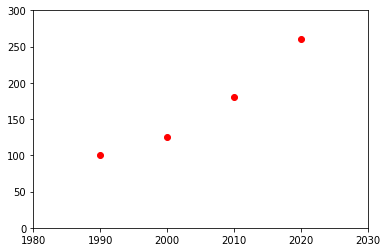

In [17]:
years = [1990, 2000, 2010, 2020]
points = [100, 125, 180, 260]

plt.plot(years, points, 'ro')
plt.axis([1980, 2030, 0, 300])
plt.show

In [ ]:
#     filepaths = []

#     for row in rows:
#         path = row[1] + '/' + row[2]
    #     print(path)
#         filepaths.append(path)

    # shuffle the whole list
#     random.shuffle(filepaths)
    
#     os.chdir('/home/rte/re-imaging/sqlite-scripts/')

    # os.chdir('src_all')
#     print(os.getcwd())

    # format the arguments for montage
    arguments = shlex.split("-colorspace sRGB -units PixelsPerInch -density 300 -background white -alpha off -geometry 240x240+2+2 -tile 12x")

    filelist = []
    # this takes a slice of the larger shuffled list
    for filepath in itertools.islice(filepaths, 0, 144):
        # put the filepath into the list but add the directory, remove the dot
        # and also add [0] to only use the first page of multi-page image documents
        filelist.append("src_all" + filepath.replace('./','/') + '[0]')

    # write list of images to file (for debugging purposes, mostly)
    fname = savepath + targetYM + "_" + cat[0] + "_" + str(cat[1]) + ".txt"
    f = open(fname, "w+")
    for row in filelist:
        f.write(row + "\n")
    f.close()
    
#     outputname = "test_py_montage.jpg"
    outputname = [savepath + "montage_" + targetYM + "_" + cat[0] + "_" + str(cat[1]) + ".jpg"]

    print("calling montage")
    # call the montage command and parse list of files and arguments
    montage_cmd = ["montage"] + filelist + arguments + outputname
#     print(montage_cmd)
    result = subprocess.Popen(montage_cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out, err = result.communicate()
    print(out)
    print(err)
    print("subprocess finished")
    print("-" * 40)

In [8]:
# targetDate = "2006-10-01"
targetDate = ""

tY = 2018
tM = 10

targetDate = str(tY) + "-" + str(tM) + "-01"
print(targetDate)

2018-10-01
